# Multi - label classification

# An irrigation machine

We're going to automate the watering of farm parcels by making an intelligent irrigation machine. So classes/labels are not mutually exclusive, you could water all, none or any combination of farm parcels based on the inputs.

An output of your multi-label model could look like this: [0.76 , 0.99 , 0.66 ]. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels [1,1,1]. For this particular problem, this would mean watering all 3 parcels in your farm is the right thing to do, according to the network, given the input sensor measurements.

Today we will use DNN and will try to find the best activation function for the dealing with an intelligent irrigation machine problem.

The data contains information from 20 sencorces and 3 parcels, overall 2000 observation.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2023-03-31 17:53:32.473225: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
irrigation_machine = pd.read_csv(r'/Users/yelyzaveta.yaroshchuk/Documents/Projects/ws_DL_Keras/datasets/irrigation_machine.csv')

In [3]:
# Create a DataFrame with all columns except category_desc
X = irrigation_machine.drop(['Unnamed: 0','parcel_0','parcel_1','parcel_2' ], axis=1).to_numpy()

# Create a category_desc labels dataset
y = irrigation_machine[['parcel_0','parcel_1','parcel_2']].to_numpy()

# Use stratified sampling to split up the dataset according to the y dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Set a random seed
np.random.seed(1)
# Return a new model with the given activation
def get_model(act_function):
    model = Sequential()
    model.add(Dense(4, input_shape=(20,), activation=act_function))
    model.add(Dense(3, activation='relu'))
    model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])
    return model


In [5]:
# Activation functions to try
activations = ['relu','leaky_relu', 'sigmoid','tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)

  # Fit the model and store the history results
  h_callback = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, verbose= 0 )
  activation_results[act] = h_callback

2023-03-31 17:53:42.143009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Extract val_loss history of each activation function
val_loss_per_function = {k:v.history['val_loss'] for k,v in activation_results.items()}

# Turn the dictionary into a pandas dataframe
val_loss_curves = pd.DataFrame(val_loss_per_function)
# Plot the curves
# val_loss_curves.plot(title='Loss per Activation function')

In [7]:
val_acc_per_function = {k:v.history['val_accuracy'] for k,v in activation_results.items()}
# Turn the dictionary into a pandas dataframe
val_acc_curves = pd.DataFrame(val_acc_per_function)
# Plot the curves
# val_acc_curves.plot(title='Accuracy per Activation function')


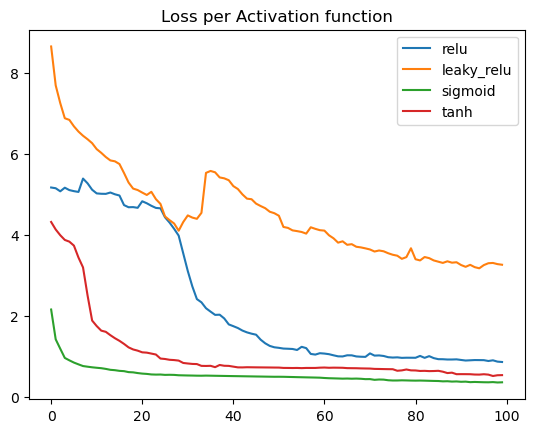

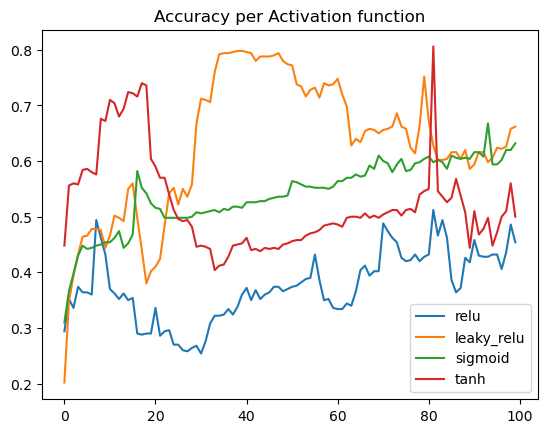

In [8]:
# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot(title='Loss per Activation function')
plt.show()

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot(title='Accuracy per Activation function')
plt.show()

Loss and accuracy curves. It looks like sigmoid activation worked best for this particular model as the hidden layer's activation function. It led to a model with lower validation loss and higher accuracy after 100 epochs.